In [3]:
from tweepy import *
import tweepy
import pandas as pd
import csv
import re 
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
#import preprocessor as p
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [4]:
#vaiables that contains the user credentials
ACCESS_TOKEN = "<access tokens>"
ACCESS_TOKEN_SECRET = "<access secret key>"

CONSUMER_API_KEY = "<consumer key>"
CONSUMER_API_SECRET = "<secret key>"

In [5]:
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
 
api = tweepy.API(auth,wait_on_rate_limit=True)
 


# Collecting data

In [6]:
query = "#Altcoin OR #Bitcoin OR #Coindesk OR #Cryptocurrency OR #Gold OR #APPL OR #GOOG OR #YHOO"
tweets = tweepy.Cursor(api.search_tweets, q = query, tweet_mode = 'extended').items(200)

In [7]:
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q=query).items(max_tweets)]

In [8]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df = pd.DataFrame(data, columns=columns)

In [9]:
df

,Tweet ID,Time,User,Tweet
0,1592876218839597057,2022-11-16 13:44:19+00:00,francisfafi,RT @michaelwrub: $500 of #Bitcoin to one lucky...
1,1592876217279348737,2022-11-16 13:44:19+00:00,JackRob66428679,RT @BTC_Archive: 🤣😅🤣 #Bitcoin \n\nH/t: @Dage...
2,1592876215568072708,2022-11-16 13:44:18+00:00,AliceQuest,RT @therationalroot: 4-year cycle at its fines...
3,1592876214322049024,2022-11-16 13:44:18+00:00,0xEthereumYoda,#Ethereum price update: \n\n#ETH $1216.17 USD\...
4,1592876214234288129,2022-11-16 13:44:18+00:00,chikybal,RT @fristiinu: 🍓🥛#Memecontest\n\n1. Create ori...
...,...,...,...,...
995,1592874929405702144,2022-11-16 13:39:12+00:00,junegent,RT @Marcocripto42: @VoltInuOfficial #VOLTINU #...
996,1592874928013185024,2022-11-16 13:39:11+00:00,0xluckiestcha,RT @MetaBeatOffl: 🚨ITS HERE!🚨 $BEAT is officia...
997,1592874927920930819,2022-11-16 13:39:11+00:00,tops_sale,RT @PumpMasterr: I will send $500 #Bitcoin to...
998,1592874927555842048,2022-11-16 13:39:11+00:00,_BlockDog_,RT @saylor: #Bitcoin is the Final Boss.


# Saving the Data

In [10]:
# Bitcoin data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='Bitcoin').items(max_tweets)]

In [11]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_Bitcoin = pd.DataFrame(data, columns=columns)

In [12]:
df_Bitcoin.head()

,Tweet ID,Time,User,Tweet
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...


In [13]:
df_Bitcoin.to_csv('Bitcoin.csv')

In [14]:
# Getting Altcoin Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='Altcoin').items(max_tweets)]

Rate limit reached. Sleeping for: 749


In [15]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_Altcoin = pd.DataFrame(data, columns=columns)

In [16]:
df_Altcoin

,Tweet ID,Time,User,Tweet
0,1592876792389701632,2022-11-16 13:46:36+00:00,wolfgan26823743,RT @JaneMoonOk: Name a coin that will moon 🌕 t...
1,1592876784668012544,2022-11-16 13:46:34+00:00,Altcoin_ALine,"RT @Alphines_NFT: If You engage with me, \nI'l..."
2,1592876761553211392,2022-11-16 13:46:28+00:00,ekueprudent,RT @__Babydoge_Coin: Which #crypto community i...
3,1592876744503361538,2022-11-16 13:46:24+00:00,NathanGayq,RT @SamNelson2010: @Cryptogems223 @AltGemsAler...
4,1592876740250144769,2022-11-16 13:46:23+00:00,everearndomo,RT @theEverEarn: Are you Registered for the $E...
...,...,...,...,...
700,1592859175012696070,2022-11-16 12:36:35+00:00,BimmerQueen,@Nostra_D4mus I am bullish on $TINU u all shou...
701,1592859089297879040,2022-11-16 12:36:15+00:00,EosTurkiye,Youtube'de yapacağımız #EOS'la ilgili sık soru...
702,1592858950764212225,2022-11-16 12:35:42+00:00,MartinnaOlson,RT @cryptoio12_io: Shill me your GEMs 🔥🔥\n\nWh...
703,1592858930933551106,2022-11-16 12:35:37+00:00,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $272.1...


In [17]:
df_Altcoin.to_csv('Altcoin.csv')

In [18]:
# Coindesk Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='Coindesk').items(max_tweets)]

In [19]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_Coindesk = pd.DataFrame(data, columns=columns)

In [20]:
df_Coindesk.to_csv('Coindesk.csv')

In [21]:
# Cryptocurrency Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='Cryptocurrency').items(max_tweets)]

Rate limit reached. Sleeping for: 623


In [22]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_Cryptocurrency = pd.DataFrame(data, columns=columns)

In [23]:
df_Cryptocurrency.to_csv('Cryptocurrency.csv')

In [24]:
# Gold Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='Gold').items(max_tweets)]

In [25]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_Gold = pd.DataFrame(data, columns=columns)

In [26]:
df_Gold.to_csv('Gold.csv')

In [27]:
#APPL Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='APPL').items(max_tweets)]

In [28]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_APPL = pd.DataFrame(data, columns=columns)

In [29]:
df_APPL.to_csv('APPL.csv')

In [30]:
# GOOG Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='GOOG').items(max_tweets)]

Rate limit reached. Sleeping for: 828


In [31]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_GOOG = pd.DataFrame(data, columns=columns)

In [32]:
df_GOOG.to_csv('GOOG.csv')

In [33]:
#YHOO Data
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q='YHOO').items(max_tweets)]

In [34]:
data=[]
columns = ['Tweet ID','Time', 'User', 'Tweet']

for tweet in searched_tweets:
    data.append([tweet.id,tweet.created_at, tweet.user.screen_name, tweet.text])

df_YHOO = pd.DataFrame(data, columns=columns)

In [35]:
df_YHOO.to_csv('YHOO.csv')

In [268]:
df_Bitcoin = pd.read_csv('Bitcoin.csv')

In [269]:
df_Altcoin = pd.read_csv('Altcoin.csv')

In [270]:
df_Coindesk = pd.read_csv('Coindesk.csv')

In [271]:
df_Cryptocurrency = pd.read_csv('Cryptocurrency.csv')

In [272]:
df_Gold = pd.read_csv('Gold.csv')

In [273]:
df_APPL = pd.read_csv('APPL.csv')

In [274]:
df_GOOG = pd.read_csv('GOOG.csv')

In [275]:
df_YHOO = pd.read_csv('YHOO.csv')

In [276]:
df_main = pd.concat([df_Bitcoin, df_Altcoin,df_Coindesk, df_Cryptocurrency, df_Gold, df_APPL, df_GOOG, df_YHOO], ignore_index=True)

In [277]:
df_main.shape

(7705, 5)

In [278]:
df_main

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...
...,...,...,...,...,...
7700,995,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,A New York jury unanimously ordered Oscar-winn...
7701,996,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,@nthabs5 @TomiRikhotso Yhoo
7702,997,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,@LynLyn13286283 Andifun nothetha ngoBrother yh...
7703,998,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,Obviously he won’t admit and I believe her 😭😭...


In [279]:
df_for_visualisation = df_main

In [280]:
df_main = df_main.drop('Unnamed: 0',axis=1)

In [281]:
df_main

,Tweet ID,Time,User,Tweet
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...
...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,A New York jury unanimously ordered Oscar-winn...
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,@nthabs5 @TomiRikhotso Yhoo
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,@LynLyn13286283 Andifun nothetha ngoBrother yh...
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,Obviously he won’t admit and I believe her 😭😭...


In [282]:
df_main.to_csv('Main_File.csv')

In [283]:
df_main.head()

,Tweet ID,Time,User,Tweet
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...


In [284]:
Backup_df = df_main

# Cleaning The data

In [285]:
df_main 

,Tweet ID,Time,User,Tweet
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...
...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,A New York jury unanimously ordered Oscar-winn...
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,@nthabs5 @TomiRikhotso Yhoo
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,@LynLyn13286283 Andifun nothetha ngoBrother yh...
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,Obviously he won’t admit and I believe her 😭😭...


# Checking for Duplicates

In [286]:
df_main['Tweet'].duplicated().any() 

True

In [287]:
# Dropping Dulicates
df_main.drop_duplicates(subset=['Tweet'], inplace=True)

In [288]:
df_main['Tweet'].duplicated().any() 

False

# Converting to lower case

In [289]:
df_main['Tweet']=df_main['Tweet'].map(lambda x: str(x).lower())

In [290]:
df_main.head()

,Tweet ID,Time,User,Tweet
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt @rollbitrewards: $100 #giveaway 🎁\n\njust #...
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"rt @fos: last year, cade cunningham signed a d..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt @neiljacobs: michael saylor: “sam may have ...
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt @martybent: the trusted third parties don’t...
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the @grayscale #bitcoin trust’s record disco...


In [291]:
df_for_visualisation = df_main

In [292]:
# Removing signs symbols and numbers
df_main['Tweet']=df_main['Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z ]+','',str(x)))

In [293]:
df_main.tail()

,Tweet ID,Time,User,Tweet
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...
7704,1592613861253054464,2022-11-15 20:21:48+00:00,mihlali_Qotoyi1,ayandamthatha brendongumede yhoo andayhleka


# Tokenization

In [294]:
word_tok=[]
for i in range(0,len(df_main)):
    #word_tok=[]
    tok=word_tokenize(df_main.iloc[i]['Tweet'])
    word_tok.append(tok)
df_main['Tokens']=word_tok

In [295]:
df_main

,Tweet ID,Time,User,Tweet,Tokens
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc..."
...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ..."


In [296]:
df_main['Tokens']

0       [rt, rollbitrewards, giveaway, just, rt, and, ...
1       [rt, fos, last, year, cade, cunningham, signed...
2       [rt, neiljacobs, michael, saylor, sam, may, ha...
3       [rt, martybent, the, trusted, third, parties, ...
4       [the, grayscale, bitcoin, trusts, record, disc...
                              ...                        
7700    [a, new, york, jury, unanimously, ordered, osc...
7701                         [nthabs, tomirikhotso, yhoo]
7702    [lynlyn, andifun, nothetha, ngobrother, yhoo, ...
7703    [obviously, he, wont, admit, and, i, believe, ...
7704     [ayandamthatha, brendongumede, yhoo, andayhleka]
Name: Tokens, Length: 4954, dtype: object

# Stopwords removal

In [297]:
stopwordsEng = sw.words('English') 
stopwordsEng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [298]:
df_main['Without Stopwords']= 0

In [299]:
s_w=[]
for i in range(0,len(df_main)):
    ai_tokens_wo_stopwords=[]
    for word in df_main.iloc[i]['Tokens']:
        if not word in stopwordsEng:
            ai_tokens_wo_stopwords.append(word)
    s_w.append(ai_tokens_wo_stopwords)
#     print(ai_tokens_wo_stopwords)
df_main['Without Stopwords'] = s_w
        
       

In [300]:
df_main

,Tweet ID,Time,User,Tweet,Tokens,Without Stopwords
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,..."
...,...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,..."


In [301]:
df_main[['Tweet','Tokens','Without Stopwords']]

,Tweet,Tokens,Without Stopwords
0,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,..."
1,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed..."
2,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma..."
3,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,..."
4,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,..."
...,...,...,...
7700,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw..."
7701,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,..."


In [302]:
len(ai_tokens_wo_stopwords)

4

# Lemmatization

In [303]:
lem = WordNetLemmatizer()

In [304]:
def lemm(x):
    tempList = []
    for word in x:
        tempList.append(lem.lemmatize(word, pos='n'))
    return tempList

df_main['Lemmatize']= df_main['Without Stopwords'].map(lambda x: lemm(x))

In [305]:
df_main

,Tweet ID,Time,User,Tweet,Tokens,Without Stopwords,Lemmatize
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,...","[rt, rollbitrewards, giveaway, rt, follow, u, ..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed...","[rt, fo, last, year, cade, cunningham, signed,..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[rt, neiljacobs, michael, saylor, sam, may, ma..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,...","[rt, martybent, trusted, third, party, dont, b..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,...","[grayscale, bitcoin, trust, record, discount, ..."
...,...,...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,..."


In [306]:
df_main[['Tweet','Tokens','Lemmatize']]

,Tweet,Tokens,Lemmatize
0,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, u, ..."
1,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fo, last, year, cade, cunningham, signed,..."
2,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma..."
3,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, party, dont, b..."
4,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trust, record, discount, ..."
...,...,...,...
7700,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw..."
7701,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,..."


# Removing words less than length 2

In [307]:
def length_word(x):
    tempList = []
    for word in x:
        if len(word) > 2:
            tempList.append(word)
    return tempList

df_main['test_removed']= df_main['Without Stopwords'].map(lambda x: length_word(x))

In [308]:
df_main

,Tweet ID,Time,User,Tweet,Tokens,Without Stopwords,Lemmatize,test_removed
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,...","[rt, rollbitrewards, giveaway, rt, follow, u, ...","[rollbitrewards, giveaway, follow, winner, rol..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed...","[rt, fo, last, year, cade, cunningham, signed,...","[fos, last, year, cade, cunningham, signed, de..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[neiljacobs, michael, saylor, sam, may, made, ..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,...","[rt, martybent, trusted, third, party, dont, b...","[martybent, trusted, third, parties, dont, bit..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,...","[grayscale, bitcoin, trust, record, discount, ...","[grayscale, bitcoin, trusts, record, discount,..."
...,...,...,...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,..."


# Visualizing data

In [309]:
df_for_visualisation

,Tweet ID,Time,User,Tweet,Tokens,Without Stopwords,Lemmatize,test_removed
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,...","[rt, rollbitrewards, giveaway, rt, follow, u, ...","[rollbitrewards, giveaway, follow, winner, rol..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed...","[rt, fo, last, year, cade, cunningham, signed,...","[fos, last, year, cade, cunningham, signed, de..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[neiljacobs, michael, saylor, sam, may, made, ..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,...","[rt, martybent, trusted, third, party, dont, b...","[martybent, trusted, third, parties, dont, bit..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,...","[grayscale, bitcoin, trust, record, discount, ...","[grayscale, bitcoin, trusts, record, discount,..."
...,...,...,...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,..."


In [310]:
df_for_visualisation

,Tweet ID,Time,User,Tweet,Tokens,Without Stopwords,Lemmatize,test_removed
0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,rt rollbitrewards giveaway just rt and follow...,"[rt, rollbitrewards, giveaway, just, rt, and, ...","[rt, rollbitrewards, giveaway, rt, follow, us,...","[rt, rollbitrewards, giveaway, rt, follow, u, ...","[rollbitrewards, giveaway, follow, winner, rol..."
1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,rt fos last year cade cunningham signed a deal...,"[rt, fos, last, year, cade, cunningham, signed...","[rt, fos, last, year, cade, cunningham, signed...","[rt, fo, last, year, cade, cunningham, signed,...","[fos, last, year, cade, cunningham, signed, de..."
2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,rt neiljacobs michael saylor sam may have made...,"[rt, neiljacobs, michael, saylor, sam, may, ha...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[rt, neiljacobs, michael, saylor, sam, may, ma...","[neiljacobs, michael, saylor, sam, may, made, ..."
3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,rt martybent the trusted third parties dont ha...,"[rt, martybent, the, trusted, third, parties, ...","[rt, martybent, trusted, third, parties, dont,...","[rt, martybent, trusted, third, party, dont, b...","[martybent, trusted, third, parties, dont, bit..."
4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,the grayscale bitcoin trusts record discount...,"[the, grayscale, bitcoin, trusts, record, disc...","[grayscale, bitcoin, trusts, record, discount,...","[grayscale, bitcoin, trust, record, discount, ...","[grayscale, bitcoin, trusts, record, discount,..."
...,...,...,...,...,...,...,...,...
7700,1592615778397954048,2022-11-15 20:29:25+00:00,YahooEnt,a new york jury unanimously ordered oscarwinni...,"[a, new, york, jury, unanimously, ordered, osc...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw...","[new, york, jury, unanimously, ordered, oscarw..."
7701,1592615300490330113,2022-11-15 20:27:31+00:00,RhaduuXesibe,nthabs tomirikhotso yhoo,"[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]","[nthabs, tomirikhotso, yhoo]"
7702,1592615036643848193,2022-11-15 20:26:28+00:00,BudazaNoxy,lynlyn andifun nothetha ngobrother yhoo bahle...,"[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ...","[lynlyn, andifun, nothetha, ngobrother, yhoo, ..."
7703,1592614459696369664,2022-11-15 20:24:11+00:00,Rise_Mororiseng,obviously he wont admit and i believe her yh...,"[obviously, he, wont, admit, and, i, believe, ...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,...","[obviously, wont, admit, believe, yhoo, thats,..."


In [311]:
df_for_visualisation['Time'].unique()

array(['2022-11-16 13:45:23+00:00', '2022-11-16 13:45:22+00:00',
       '2022-11-16 13:45:21+00:00', ..., '2022-11-15 20:26:28+00:00',
       '2022-11-15 20:24:11+00:00', '2022-11-15 20:21:48+00:00'],
      dtype=object)

In [312]:
df_Gold

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592883852745510912,2022-11-16 14:14:39+00:00,SETSUKO070,𝗜𝗤𝗜𝗬𝗜 𝗱𝗶𝗮𝗺𝗼𝗻𝗱/gold 🍮\n\n 30 days ˗ˏˋ 20...
1,1,1592883850266693632,2022-11-16 14:14:38+00:00,autunno_gufo,RT @pitsutoburu92: 【🔆ピットブル ゴールドVer.2🔆】収支報告：11/...
2,2,1592883849914380288,2022-11-16 14:14:38+00:00,Gold_Nyokki,押し目にしか見えなくなってきたのでロング追加。まぁ、俺のピラミッティングは大体成功しないけど...
3,3,1592883849490755584,2022-11-16 14:14:38+00:00,Ashock19676391,All is not gold #推特粉丝 #推特刷粉丝 #推特买粉 IE R I L...
4,4,1592883848462757888,2022-11-16 14:14:38+00:00,akio_gold,@masyu_gol その貰う所に名前や住所とか登録されるのかなぁ？って感じだね😲\n1回無...
...,...,...,...,...,...
995,995,1592882476476936193,2022-11-16 14:09:11+00:00,aruto_gold,えっちじゃん‼️
996,996,1592882475357081600,2022-11-16 14:09:11+00:00,MagpieBridge,RT @EviVintage: #Vintage #Stratton Queen #Comp...
997,997,1592882475210280960,2022-11-16 14:09:11+00:00,KumarRebe3,Mandel Wallace #深圳 Wendell Crofts #成都 Cherry W...
998,998,1592882475059093509,2022-11-16 14:09:11+00:00,J1_gold,J1 GOLD: [23:09] #NowPlaying Okada Yukiko (岡田有...


In [313]:
df_Bitcoin

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592876489510649857,2022-11-16 13:45:23+00:00,bbhwannie,RT @RollbitRewards: $100 #Giveaway 🎁\n\nJust #...
1,1,1592876487576670208,2022-11-16 13:45:23+00:00,kshajv,"RT @FOS: Last year, Cade Cunningham signed a d..."
2,2,1592876487191171072,2022-11-16 13:45:23+00:00,Estercita_007,RT @NeilJacobs: Michael Saylor: “Sam may have ...
3,3,1592876486842716160,2022-11-16 13:45:23+00:00,Bitcoin_is_,RT @MartyBent: The trusted third parties don’t...
4,4,1592876486633041921,2022-11-16 13:45:23+00:00,rbj18,The @Grayscale #Bitcoin Trust’s record disco...
...,...,...,...,...,...
995,995,1592875175623942144,2022-11-16 13:40:10+00:00,Dabeez666,RT @VailshireCap: A gentle reminder that #Bitc...
996,996,1592875175376457728,2022-11-16 13:40:10+00:00,Kriptotakip1122,@Vforrkripto Ses kaydı ile atmanızı bekliyoruz...
997,997,1592875174399021056,2022-11-16 13:40:10+00:00,btcproof,Approximately every 10 minutes a new block is ...
998,998,1592875173891407873,2022-11-16 13:40:10+00:00,iproup,¿Guerra cripto?: la destructiva crítica de un ...


In [314]:

df_Altcoin

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592876792389701632,2022-11-16 13:46:36+00:00,wolfgan26823743,RT @JaneMoonOk: Name a coin that will moon 🌕 t...
1,1,1592876784668012544,2022-11-16 13:46:34+00:00,Altcoin_ALine,"RT @Alphines_NFT: If You engage with me, \nI'l..."
2,2,1592876761553211392,2022-11-16 13:46:28+00:00,ekueprudent,RT @__Babydoge_Coin: Which #crypto community i...
3,3,1592876744503361538,2022-11-16 13:46:24+00:00,NathanGayq,RT @SamNelson2010: @Cryptogems223 @AltGemsAler...
4,4,1592876740250144769,2022-11-16 13:46:23+00:00,everearndomo,RT @theEverEarn: Are you Registered for the $E...
...,...,...,...,...,...
700,700,1592859175012696070,2022-11-16 12:36:35+00:00,BimmerQueen,@Nostra_D4mus I am bullish on $TINU u all shou...
701,701,1592859089297879040,2022-11-16 12:36:15+00:00,EosTurkiye,Youtube'de yapacağımız #EOS'la ilgili sık soru...
702,702,1592858950764212225,2022-11-16 12:35:42+00:00,MartinnaOlson,RT @cryptoio12_io: Shill me your GEMs 🔥🔥\n\nWh...
703,703,1592858930933551106,2022-11-16 12:35:37+00:00,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $272.1...


In [315]:

df_Coindesk

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592880440532430859,2022-11-16 14:01:05+00:00,Peticiondemano,@CoinDesk @circle Apple will regret that they ...
1,1,1592880435381800960,2022-11-16 14:01:04+00:00,theobesteman,RT @CoinDesk: JUST IN: The lending arm of @Gen...
2,2,1592880427030949889,2022-11-16 14:01:02+00:00,webthreechain,Genesis’ Crypto-Lending Unit Is Halting Custom...
3,3,1592880412103057408,2022-11-16 14:00:59+00:00,Ellain1919,@CoinDesk @GenesisTrading @SBF_FTX @LisaBragan...
4,4,1592880410157281285,2022-11-16 14:00:58+00:00,Quackaracha,RT @Tree_of_Alpha: Genesis’ Crypto-Lending Uni...
...,...,...,...,...,...
995,995,1592869740581883908,2022-11-16 13:18:34+00:00,DeFiyst,@DCGco @GenesisTrading Incentives don't fully ...
996,996,1592869736446316544,2022-11-16 13:18:33+00:00,sunilraju1,RT @Tree_of_Alpha: The fact DCG owns both Gene...
997,997,1592869733044322304,2022-11-16 13:18:33+00:00,GoodWildandFree,RT @DeItaone: GENESIS’ CRYPTO-LENDING UNIT IS ...
998,998,1592869732398796801,2022-11-16 13:18:32+00:00,SD_57GX,RT @MoneyRadar_FR: 🚨ALERTE - GENESIS suspend l...


In [316]:
df_Cryptocurrency['Time'] = pd.to_datetime(df_Cryptocurrency['Time'])

df_Cryptocurrency

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592881085917974530,2022-11-16 14:03:39+00:00,BlockchainBeavr,"If you found this valuable... like it, share i..."
1,1,1592881085754798081,2022-11-16 14:03:39+00:00,Anthony,Cryptocurrency lender Genesis told clients tha...
2,2,1592881084966252544,2022-11-16 14:03:39+00:00,ExchangeWhales,"🚀 🚀 🚀 $1,540,855 ETHUSDT LONGED @$1,210.00 on ..."
3,3,1592881079329132544,2022-11-16 14:03:38+00:00,BlockchainBeavr,"Once a miner is the first to find the value, t..."
4,4,1592881075654922242,2022-11-16 14:03:37+00:00,Monkey185541321,RT @MetaBeatOffl: 🚨ITS HERE!🚨 $BEAT is officia...
...,...,...,...,...,...
995,995,1592877990937255936,2022-11-16 13:51:21+00:00,tricochan_963,RT @Las_Fro: Gold mined at 94% is great💲\nHigh...
996,996,1592877990547165184,2022-11-16 13:51:21+00:00,alexbondar0,Libonomy Blockchain Introduction https://t.co/...
997,997,1592877978903777285,2022-11-16 13:51:19+00:00,MdYusubali6,RT @peakpokclub: PeakPok Club X Cheatmoon\n\nA...
998,998,1592877976466919427,2022-11-16 13:51:18+00:00,Lifeboy3388,RT @QuaiNetwork: What types of DApps are you e...


In [317]:

df_APPL

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592882513164107777,2022-11-16 14:09:20+00:00,KathyKi34192246,RT @Iamnaresh16: $LCID with $APPL !!! https:/...
1,1,1592881596683939841,2022-11-16 14:05:41+00:00,appl_lee,RT @dw_chinese: 钢琴、#iPhone都是为男人量身打造的？\n你知道吗，#钢...
2,2,1592881276771766275,2022-11-16 14:04:25+00:00,MaryCherby,"RT @fred_manfrin: Avant le coucher, un moment ..."
3,3,1592880270256275456,2022-11-16 14:00:25+00:00,hdrmywaftkhr1,RT @mwssh_alkhyryh: السلام عليكم ✋🇸🇦\nبعد قليل...
4,4,1592879716629123075,2022-11-16 13:58:13+00:00,mizy_4v,@Appl_he 仲良くしましょう(๑&gt;◡&lt;๑)\nなんて呼んだらいいですか？
...,...,...,...,...,...
995,995,1592171013491822594,2022-11-14 15:02:05+00:00,daniellesacks,"RT @sarahsholder: ""the sales pressure, exacerb..."
996,996,1592170520690270209,2022-11-14 15:00:07+00:00,CryptoTreeMap,https://t.co/t6kVcSK6IH\n\nStock market:\n$NVO...
997,997,1592170485336670208,2022-11-14 14:59:59+00:00,jrbattaglia,RT @josheidelson: New @BW feature: Apple Store...
998,998,1592170158113554433,2022-11-14 14:58:41+00:00,BloombergFeed,RT @josheidelson: New @BW feature: Apple Store...


In [318]:
df_GOOG['Time'] = pd.to_datetime(df_GOOG['Time'])
df_GOOG

,Unnamed: 0,Tweet ID,Time,User,Tweet
0,0,1592883849981149184,2022-11-16 14:14:38+00:00,Gambiste1,RT @CryptoJelleNL: With $LOW beating their ear...
1,1,1592883698395156482,2022-11-16 14:14:02+00:00,DrDividend47,RT @DrDividend47: Investing Goals For 2023\n\n...
2,2,1592883639939117058,2022-11-16 14:13:48+00:00,Yessah__2,L'ambassadeur de Pologne ne voit aucune raison...
3,3,1592883604992184320,2022-11-16 14:13:40+00:00,panchor87819952,RT @terra_cremada: HIPOCRESÍA CLIMÀTICA \nTu m...
4,4,1592883443947696129,2022-11-16 14:13:02+00:00,JanBorisZoubek,"@bulios_czsk CEZ, KB, ERSTE, NIO, PFE, GOOG, C..."
...,...,...,...,...,...
995,995,1592705480773992449,2022-11-16 02:25:52+00:00,hi___goog,せんちょ！そくほー！ https://t.co/4MYfV6gLNd
996,996,1592705451367362560,2022-11-16 02:25:45+00:00,GusBasaldua,RT @ValueMastering: Acciones comunes en los po...
997,997,1592705294446256128,2022-11-16 02:25:07+00:00,minotaur887,RT @EconomyApp: WW Cloud Infrastructure Market...
998,998,1592704985082789890,2022-11-16 02:23:54+00:00,49tomo_luv,RT @salaco6: おはようｺﾞｻｲﾏｽ·͜·♡\n\n11月16日\n#ぞうさんの日...


In [319]:
# Grouping the dataframe based time of tweet and plotting the tweets on a daily basis.
import matplotlib.pyplot as plt
import numpy as np
def DailyTweets(title,d):
     
    d = pd.DataFrame(d.groupby(pd.Grouper(key='Time', axis=0, freq='D')).count()['User'])
    
    print(f"The daily number of tweets for {title} is shown in the graph below: ")
    
    fig, ax = plt.subplots(figsize=(7,5))
    d.columns = d.columns.str.replace(' ','_')
    d.User.plot.bar()   
    plt.xticks(np.arange(0,len(d),1).tolist(),[str(i)[:10] for i in d.index ], rotation=30, horizontalalignment="center")
    plt.xlabel("Days")
    plt.ylabel("Number of tweets")
    plt.title(title)
    for bars in ax.containers:
        ax.bar_label(bars)
    print('-'*100)
    plt.show()

In [320]:
# Implementing the daily number of tweets for all the keywords
key_value = [['#Altcoin',df_Altcoin],['#Bitcoin',df_Bitcoin],['Coindesk',df_Coindesk],['Cryptocurrency',df_Cryptocurrency],['Gold',df_Gold],['APPL',df_APPL],['GOOG',df_GOOG],['YHOO',df_YHOO]]
#key_value
for i in range(8):
    DailyTweets(key_value[i][0],key_value[i][1])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [321]:
# Function of grouping the tweets based on time on a daily basis and plotting the days with the number of users.
def dailyUsers(title,d):
    d['Time'] = d['Time'].apply(lambda x: str(x)[0:10])
    d = pd.DataFrame(d.groupby('Time')['User'].unique())
    d = d['User'].apply(lambda x: len(x))
    
    fig, ax = plt.subplots(figsize=(7,5))
    d.plot.bar()   
    plt.xlabel("Days")
    plt.ylabel("Number of users")
    plt.title(f"Daily users for {title}")
    plt.xticks(np.arange(0,len(d),1).tolist(),[str(i)[:10] for i in d.index ], rotation=30, horizontalalignment="center")
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

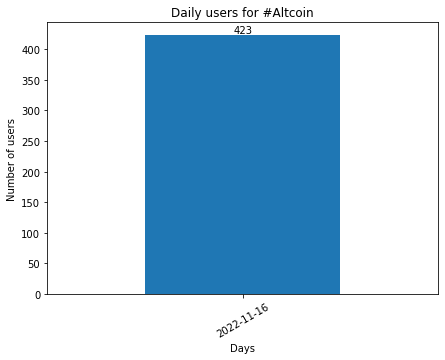

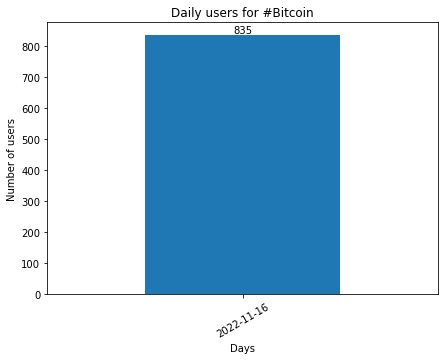

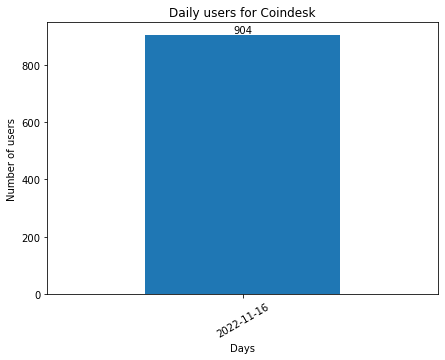

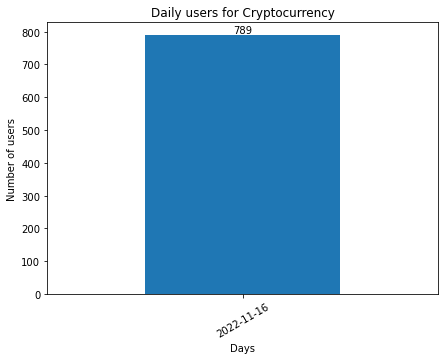

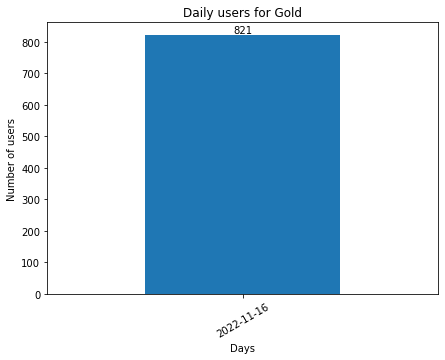

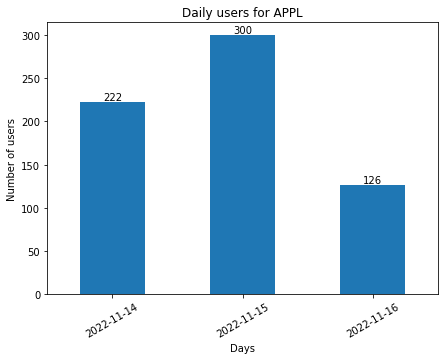

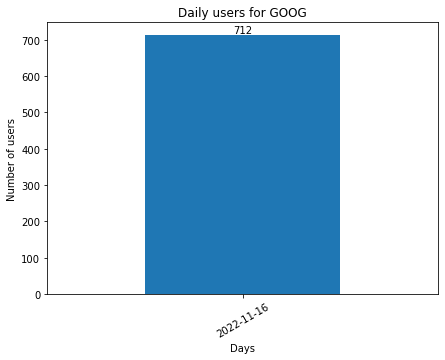

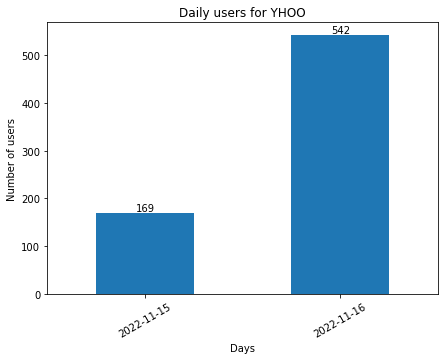

In [322]:
# Plotting the number of daily users for all 8 available dataframe
key_value = [['#Altcoin',df_Altcoin],['#Bitcoin',df_Bitcoin],['Coindesk',df_Coindesk],['Cryptocurrency',df_Cryptocurrency],['Gold',df_Gold],['APPL',df_APPL],['GOOG',df_GOOG],['YHOO',df_YHOO]]
for i in range(0,8):
    dailyUsers(key_value[i][0],key_value[i][1])